<a href="https://colab.research.google.com/github/tortsBsus/Ovarian_Cancer_Prediction/blob/main/Final_Ovarian_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=10)
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Load the dataset***

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Ovarian Cancer Prediction/SupplementaryData.csv')
X=dataset.iloc[:,1:-1] #independent
y=dataset.iloc[:,-1].values #dependent
df = pd.DataFrame(X)
df.drop(df.columns[[13]], axis=1, inplace=True)
X=df
cols=df.columns
df.head()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.10,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.50,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [ ]:
df=pd.DataFrame(y)
df.head()

,0
0,0
1,0
2,0
3,0
4,0


# ***Fill the missing values***

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X) #for numerical columns
X=imputer.transform(X)

df=pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,3.58,19.36,47.0,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,183.948967,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0.0,0.78,0.22,5.70,11.70,141.3,76.2,0.09,13.4,1.46,74.0,2.64,13.7,5.5,73.9,396.4
1,34.24,23.98,61.0,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.100000,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1.0,0.82,0.41,5.50,10.00,142.0,76.5,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2
2,1.50,18.40,39.0,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.560000,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0.0,1.00,0.25,5.40,11.40,138.9,69.7,0.13,15.2,0.97,112.0,4.62,12.0,14.8,77.9,209.2
3,2.75,16.60,45.0,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.500000,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1.0,1.11,0.42,6.55,7.38,139.1,65.5,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6
4,2.36,19.97,45.0,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.900000,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0.0,1.08,0.69,10.00,10.40,141.0,59.5,0.28,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0


# ***Train Test Split***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train)

[[  1.34  20.89  27.   ...   8.2   77.9  151.2 ]
 [  1.7   21.81  56.   ...   4.7   67.   185.6 ]
 [  1.92  26.07  74.   ...   5.8   54.7  285.2 ]
 ...
 [  1.77  20.33  51.   ...  10.8   78.3  230.1 ]
 [  2.26  23.    56.   ...   9.5   73.8  350.3 ]
 [  2.02  22.46  75.   ...   5.    66.9  279.9 ]]


# ***Selecting 8 features out of 48 using MRMR***

In [ ]:
!pip install git+https://github.com/smazzanti/mrmr
import pandas as pd
from mrmr import mrmr_classif

mrmr = mrmr_classif(pd.DataFrame(X_train), pd.Series(y_train), K = 8)  #selects 8 features out of 48

  Cloning https://github.com/smazzanti/mrmr to /tmp/pip-req-build-f5nd41u7
  Running command git clone -q https://github.com/smazzanti/mrmr /tmp/pip-req-build-f5nd41u7


100%|██████████| 8/8 [00:00<00:00, 19.84it/s]


In [ ]:
print(mrmr)

[2, 13, 11, 25, 32, 38, 24, 21]


In [ ]:
X=X[:,[2,11, 13,21,24,25, 32, 38]]  #8 features considered
X_train=X_train[:,[2,11, 13,21,24,25, 32, 38]]
X_test=X_test[:,[2,11, 13,21,24,25, 32, 38]]
print(X)

[[4.70000000e+01 1.53600000e+01 1.40000000e+00 ... 8.90000000e+01
  0.00000000e+00 7.62000000e+01]
 [6.10000000e+01 2.44400000e+03 2.46000000e+00 ... 1.28000000e+02
  1.00000000e+00 7.65000000e+01]
 [3.90000000e+01 5.60800000e+01 7.70000000e-01 ... 1.31000000e+02
  0.00000000e+00 6.97000000e+01]
 ...
 [5.90000000e+01 5.13300000e+01 2.31000000e+00 ... 1.44000000e+02
  1.00000000e+00 6.65755426e+01]
 [3.00000000e+01 5.38700000e+01 9.30000000e-01 ... 1.54000000e+02
  0.00000000e+00 6.65755426e+01]
 [3.90000000e+01 4.64500000e+01 7.60000000e-01 ... 1.28000000e+02
  0.00000000e+00 6.65755426e+01]]


In [ ]:
data=pd.DataFrame(data=X,columns=cols[[2,11, 13,21,24,25, 32, 38]])
data

,Age,CA125,CEA,GLO,HE4,HGB,Menopause,NEU
0,47.0,15.36,1.40,28.5,183.948967,89.0,0.0,76.200000
1,61.0,2444.00,2.46,32.1,934.100000,128.0,1.0,76.500000
2,39.0,56.08,0.77,32.5,47.560000,131.0,0.0,69.700000
3,45.0,2555.00,0.82,26.9,853.500000,123.0,1.0,65.500000
4,45.0,1391.00,0.42,31.5,404.900000,122.0,0.0,59.500000
...,...,...,...,...,...,...,...,...
344,52.0,50.80,1.74,31.8,31.450000,142.0,0.0,66.575543
345,37.0,21.93,1.67,27.4,44.440000,80.0,0.0,66.575543
346,59.0,51.33,2.31,22.6,42.650000,144.0,1.0,66.575543
347,30.0,53.87,0.93,28.2,30.780000,154.0,0.0,66.575543


In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = pd.DataFrame(X).corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7
0,1.000000,0.334319,-0.004601,0.104942,0.347403,-0.088018,0.786053,0.295981
1,0.334319,1.000000,0.036842,0.111477,0.522873,-0.000517,0.332439,0.274545
2,-0.004601,0.036842,1.000000,0.070805,-0.037584,-0.076939,-0.027261,0.059905
3,0.104942,0.111477,0.070805,1.000000,0.031127,-0.008824,0.052938,-0.019713
4,0.347403,0.522873,-0.037584,0.031127,1.000000,-0.171004,0.329901,0.271792
5,-0.088018,-0.000517,-0.076939,-0.008824,-0.171004,1.000000,0.020342,-0.086857
6,0.786053,0.332439,-0.027261,0.052938,0.329901,0.020342,1.000000,0.232206
7,0.295981,0.274545,0.059905,-0.019713,0.271792,-0.086857,0.232206,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc38f2db4d0>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

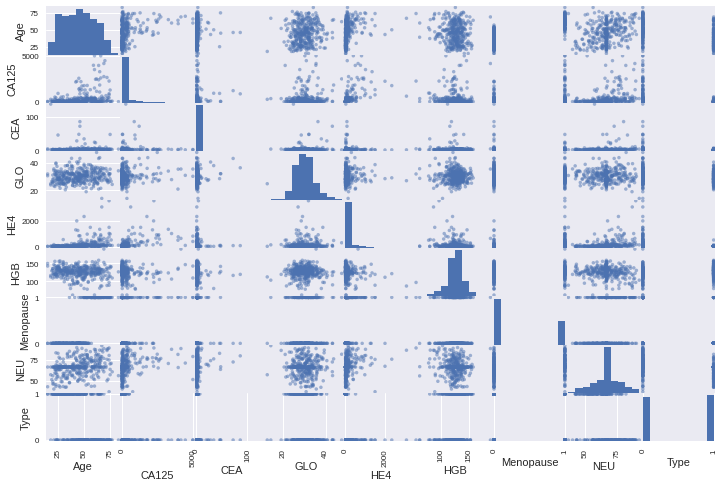

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(pd.DataFrame(pd.concat([data,pd.DataFrame(y,columns=['Type'])],axis=1)),figsize=(12,8))

# ***Plotting 8 features WRT Type***

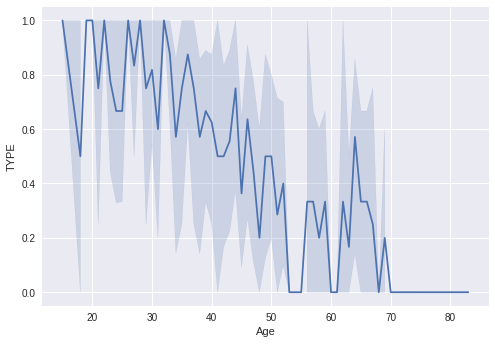

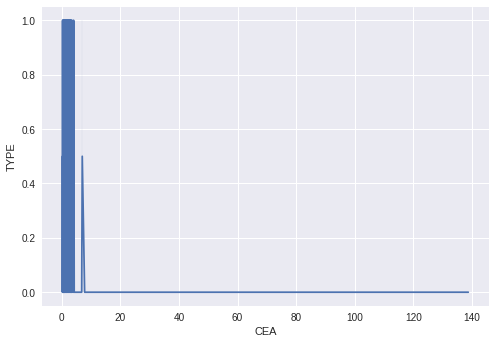

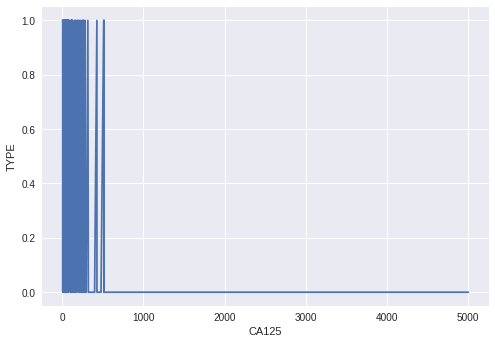

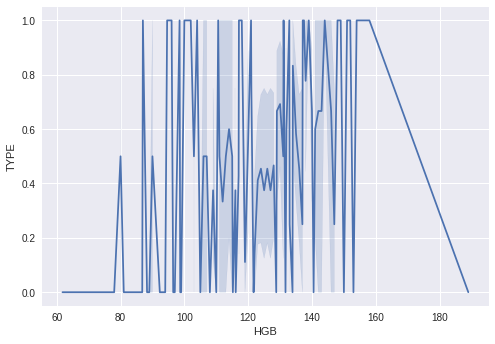

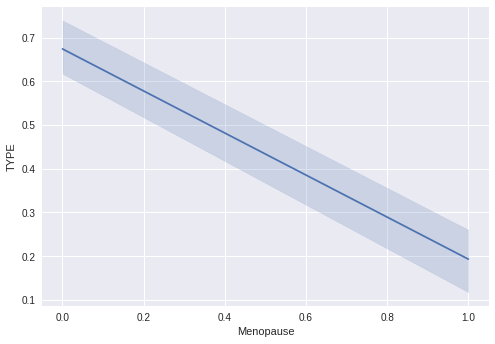

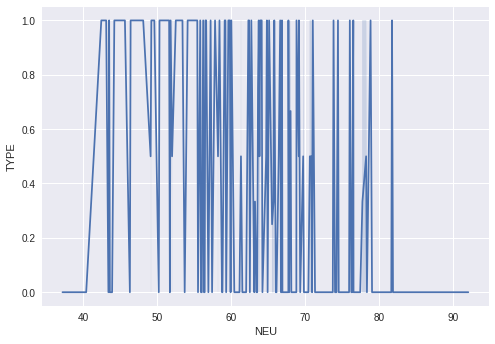

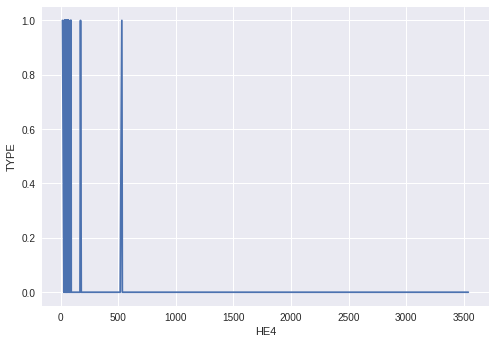

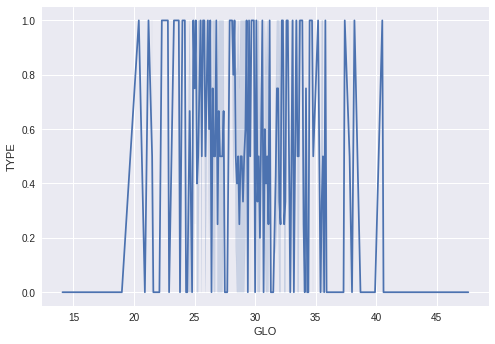

In [ ]:
import seaborn as sns
for i in range(8):
  sns.lineplot(data=dataset,x=cols[mrmr[i]],y="TYPE")
  plt.show()

# ***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)

[[-1.18395753 -0.40871207 -0.22403441 ...  0.37185003 -0.73582366
   0.04244788]
 [ 0.70808284  0.03486765 -0.14650193 ... -0.12522685  1.35902126
   1.85750811]
 [ 1.88245272  0.65125018 -0.10353212 ... -0.18736146  1.35902126
   1.41177753]
 ...
 [ 0.38186898 -0.35711544 -0.21562727 ... -0.93297679 -0.73582366
   0.79765984]
 [ 0.70808284  1.18742365 -0.24084868 ... -0.37376529  1.35902126
   0.9462367 ]
 [ 1.94769549  1.13907506 -0.0811131  ...  0.74465769  1.35902126
  -0.866401  ]]


In [ ]:
print(X_test)

[[-0.00958765 -0.39787702 -0.19133999 ...  0.93106153 -0.73582366
  -0.29190381]
 [ 1.49099609 -0.38917428 -0.01572426 ... -0.9951114   1.35902126
   1.82779274]
 [-0.07483042 -0.43596084 -0.14369955 ... -1.64752481 -0.73582366
   0.02506016]
 ...
 [ 1.29526778 -0.42179098 -0.12595115 ...  0.30971542  1.35902126
   0.04244788]
 [ 0.5775973  -0.40366646 -0.26139946 ... -0.24949607  1.35902126
  -1.96586977]
 [-0.40104428 -0.39016604 -0.22403441 ...  0.1854462  -0.73582366
   0.04244788]]


# ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
clf = DecisionTreeClassifier(max_depth=4,criterion='gini')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
print(y_test)

[1 0 1 ... 1 0 1]


In [ ]:
print(y_pred)

[1 0 1 ... 1 0 1]


In [ ]:
print(clf.predict([[50,35,0.85,32,90,65,0,75]]))

[0]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8714285714285714


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.89      0.86      0.87        36

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



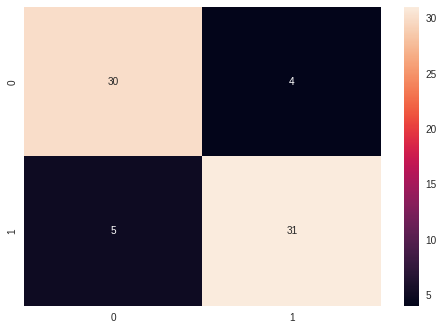

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    clf,
    out_file="ocp.dot",
    feature_names=cols[[2,11, 13,21,24,25, 32, 38]],
    class_names=['0','1'],
    rounded=True,
    filled=True
)

In [ ]:
!dot -Tpng ocp.dot -o ocp.png

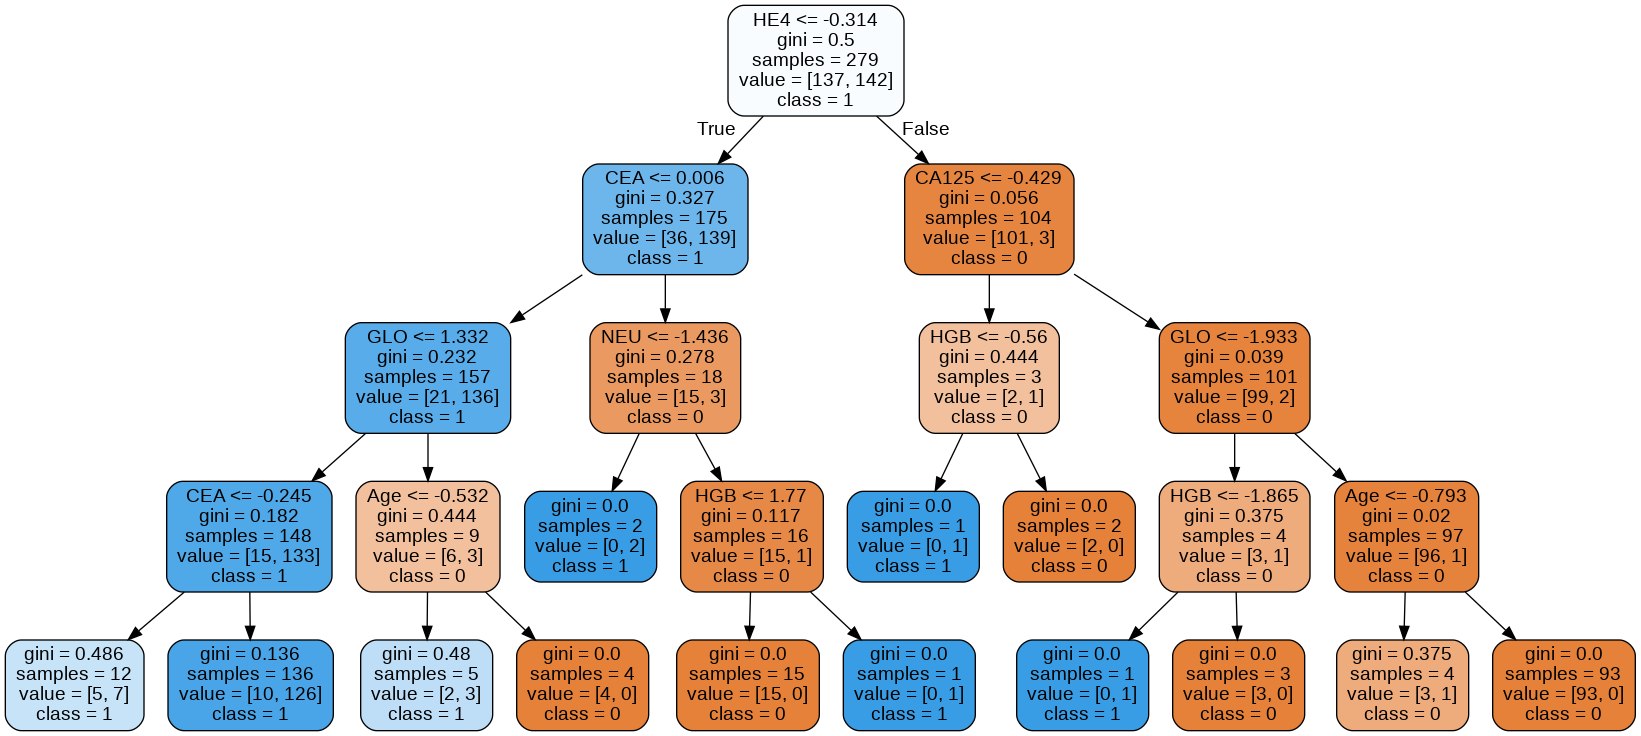

In [ ]:
from IPython.display import Image
Image(filename="ocp.png")

[Text(0.5, 0.9, 'X[4] <= -0.314\ngini = 0.5\nsamples = 279\nvalue = [137, 142]'),
 Text(0.29545454545454547, 0.7, 'X[2] <= 0.006\ngini = 0.327\nsamples = 175\nvalue = [36, 139]'),
 Text(0.18181818181818182, 0.5, 'X[3] <= 1.332\ngini = 0.232\nsamples = 157\nvalue = [21, 136]'),
 Text(0.09090909090909091, 0.3, 'X[2] <= -0.245\ngini = 0.182\nsamples = 148\nvalue = [15, 133]'),
 Text(0.045454545454545456, 0.1, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.13636363636363635, 0.1, 'gini = 0.136\nsamples = 136\nvalue = [10, 126]'),
 Text(0.2727272727272727, 0.3, 'X[0] <= -0.532\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.22727272727272727, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3181818181818182, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4090909090909091, 0.5, 'X[7] <= -1.436\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.45454545454545453, 0.3, 'X[5] <= 1.7

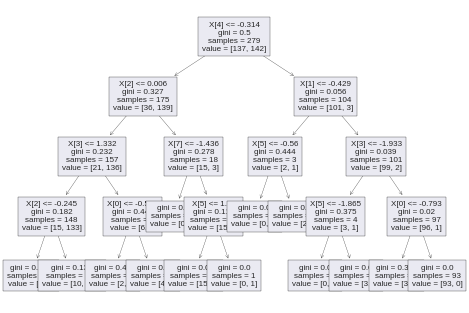

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf,fontsize=8)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.8741830065359477

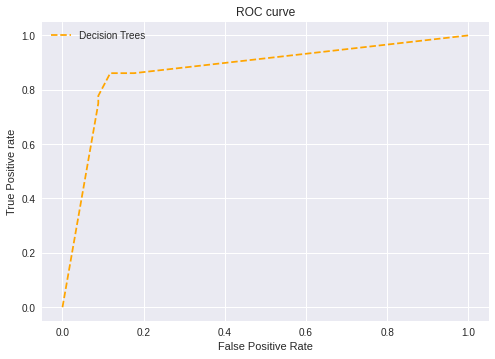

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision Trees')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ***Random Forests***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train, y_train);

In [ ]:
predictions = rf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.18 degrees.


In [ ]:
for i in range(len(predictions)):
  predictions[i]=round(predictions[i])

In [ ]:
print(predictions)

[1. 0. 1. ... 1. 0. 1.]


In [ ]:
print(rf.predict([[50,35,0.85,32,90,65,0,75]]))

[0.]


In [ ]:
print('Accuracy:',metrics.accuracy_score(y_test,predictions))

Accuracy: 0.8857142857142857


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.89      0.89      0.89        36

    accuracy                           0.89        70
   macro avg       0.89      0.89      0.89        70
weighted avg       0.89      0.89      0.89        70



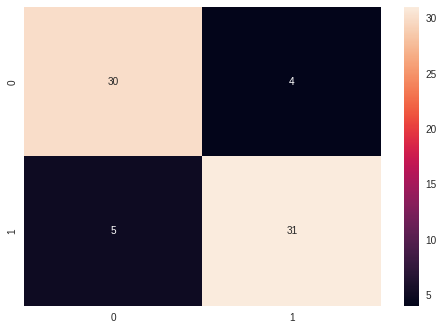

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns 
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.8741830065359477

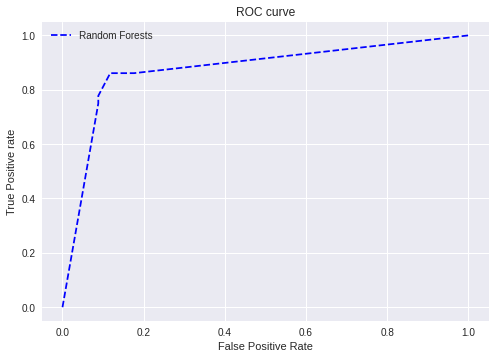

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='blue', label='Random Forests')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ***Support Vector Machine***

In [ ]:
from sklearn import svm
clf = svm.SVC(probability=True)

Tried various hyperparameter kernel=linear, polynomial, sigmoid
decision function shape= ovo which will treat multi-class classifier as binary 
class weight to improve precision 

In [ ]:
clf.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 1 ... 0 0 1]


In [ ]:
clf.support_vectors_

array([[-0.92298645, -0.43875018, -0.25672883, ..., -1.63509788,
        -0.73582366, -1.00507274],
       [ 0.44711175, -0.01337844,  0.01408208, ..., -0.37376529,
        -0.73582366,  2.00608497],
       [ 1.75196718, -0.31435793, -0.2202979 , ...,  0.12331159,
         1.35902126, -1.57956993],
       ...,
       [-0.07483042, -0.41763796,  0.35418973, ..., -1.88984979,
        -0.73582366, -1.63900068],
       [ 0.05565512, -0.39471577, -0.18386698, ...,  0.55825386,
        -0.73582366,  0.04244788],
       [-1.44492862, -0.41928677, -0.17078921, ..., -0.49182105,
        -0.73582366, -2.0322341 ]])

In [ ]:
clf.support_

array([  5,  15,  20, ..., 266, 272, 274], dtype=int32)

In [ ]:
clf.n_support_

array([79, 65], dtype=int32)

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8714285714285714


In [ ]:
print(clf.predict([[50,35,0.85,32,90,65,0,75]]))

[0]


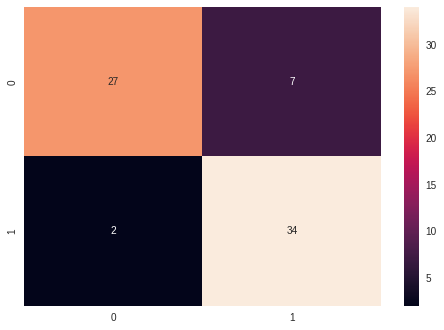

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86        34
           1       0.83      0.94      0.88        36

    accuracy                           0.87        70
   macro avg       0.88      0.87      0.87        70
weighted avg       0.88      0.87      0.87        70



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9272875816993463

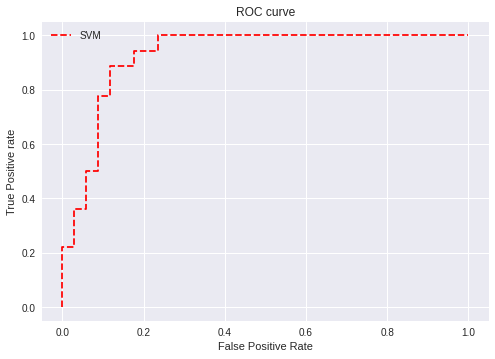

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='red', label='SVM')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 1 ... 1 0 1]


In [ ]:
print (np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
pred_proba= classifier.predict(X_test)
pred_proba

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
Accuracy = classifier.score(X_test,y_test)
Accuracy

0.8857142857142857

In [ ]:
print(classifier.predict([[50,35,0.85,32,90,65,0,75]]))

[0]


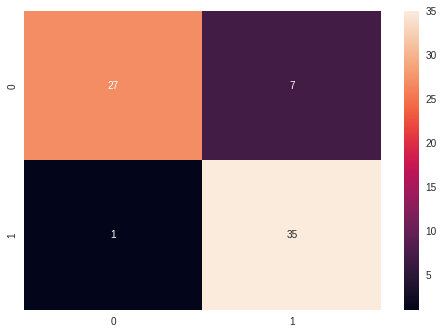

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.83      0.97      0.90        36

    accuracy                           0.89        70
   macro avg       0.90      0.88      0.88        70
weighted avg       0.90      0.89      0.88        70



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = classifier.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9321895424836601

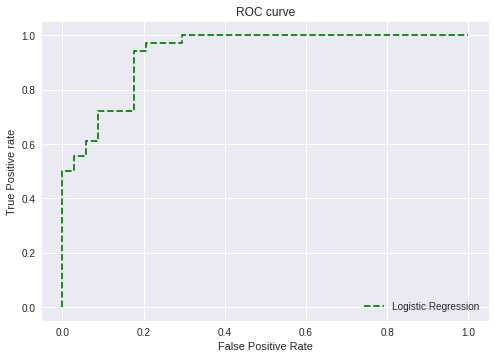

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ***Naive Bayes***

In [ ]:
print(X_train[1],y_train[1])

[ 0.70808284  0.03486765 -0.14650193 -0.23822132  0.06130424 -0.12522685
  1.35902126  1.85750811] 0


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
naive_bayes_model = BernoulliNB()

In [ ]:
naive_bayes_model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
predictions = naive_bayes_model.predict(X_test)

In [ ]:
print(predictions, y_test)

[1 0 1 ... 0 0 1] [1 0 1 ... 1 0 1]


In [ ]:
print(naive_bayes_model.predict([[50,35,0.85,32,90,65,0,75]]))

[0]


In [ ]:
print('Accuracy:',metrics.accuracy_score(y_test,predictions))

Accuracy: 0.8


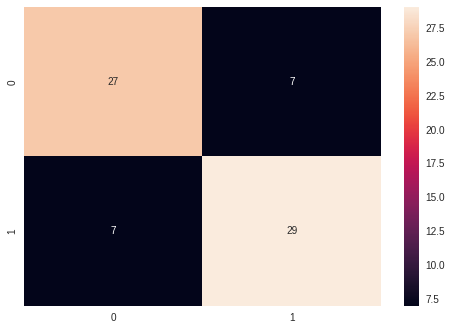

In [ ]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.83      0.97      0.90        36

    accuracy                           0.89        70
   macro avg       0.90      0.88      0.88        70
weighted avg       0.90      0.89      0.88        70



In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(naive_bayes_model, X_train, y_train, cv=7)

In [ ]:
y_train_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[101,  36],
       [ 20, 122]])

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = naive_bayes_model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.883578431372549

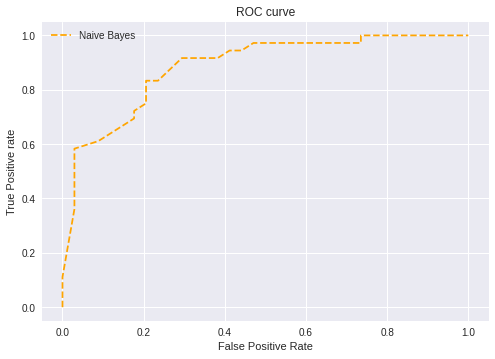

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ***KNN Classifier***


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_y_pred = KNN_model.predict(X_test)
knn_y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print(KNN_model.predict([[50,35,0.85,32,90,65,0,75]]))

[0]


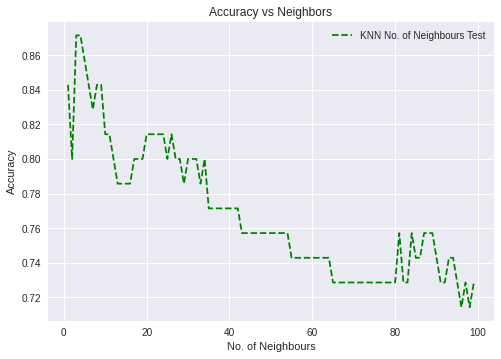

In [ ]:
KNNPreds=[]
for i in range(1,100):
  KNN_Test_model = KNeighborsClassifier(n_neighbors=i)
  KNN_Test_model.fit(X_train,y_train)
  KNNtestpred = KNN_Test_model.predict(X_test)
  KNNPreds.append(metrics.accuracy_score(y_test, KNNtestpred))

plt.style.use('seaborn')

plt.plot(range(1,100), KNNPreds, linestyle='--',color='green', label='KNN No. of Neighbours Test')

plt.title('Accuracy vs Neighbors')
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracy')

plt.legend(loc='best')
plt.savefig('KNN',dpi=300)
plt.show();



In [ ]:
print(KNNPreds.index(max(KNNPreds))+1)

3


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, knn_y_pred))

Accuracy: 0.8714285714285714


In [ ]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.86      0.89      0.88        36

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



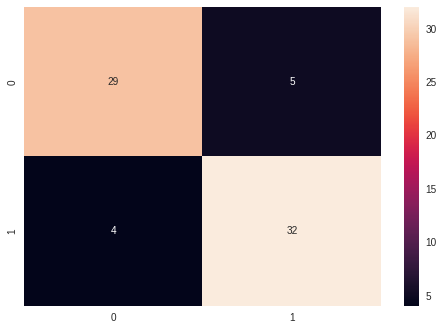

In [ ]:
cm = confusion_matrix(y_test,knn_y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = KNN_model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.8974673202614379

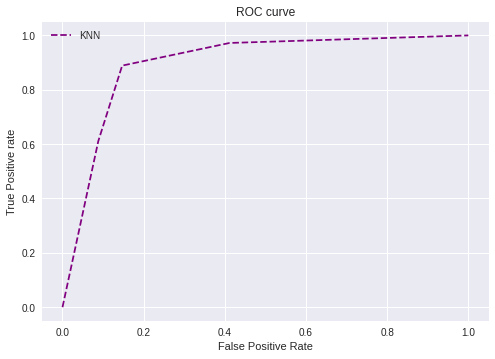

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='purple', label='KNN')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ***Voting Classifier***

####Hard Voting

In [ ]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(random_state=1)))
estimator.append(('SVC', svm.SVC(probability=True)))
estimator.append(('DTC', DecisionTreeClassifier(max_depth=4,criterion='gini',random_state=1)))
estimator.append(('NB',BernoulliNB()))
estimator.append(('KNN',KNeighborsClassifier(n_neighbors=3)))
#estimator.append(('RF',RandomForestRegressor(n_estimators = 1000, random_state = 42)))

In [ ]:
from sklearn.ensemble import VotingClassifier
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

In [ ]:
print(vot_hard.predict([[50,35,0.85,32,90,65,0,75]]))

[0]


In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.8714285714285714


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.85      0.92      0.88        36

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



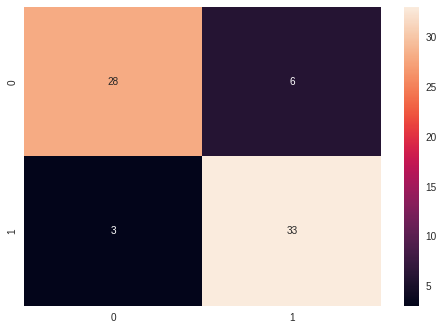

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

####Soft Voting

In [ ]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)

In [ ]:
print(vot_soft.predict([[50,35,0.85,32,90,65,0,75]]))

[0]


In [ ]:
# using accuracy_score
print(metrics.accuracy_score(y_test,y_pred))

0.8857142857142857


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        34
           1       0.87      0.92      0.89        36

    accuracy                           0.89        70
   macro avg       0.89      0.88      0.89        70
weighted avg       0.89      0.89      0.89        70



In [ ]:
pred_prob = vot_soft.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9558823529411764

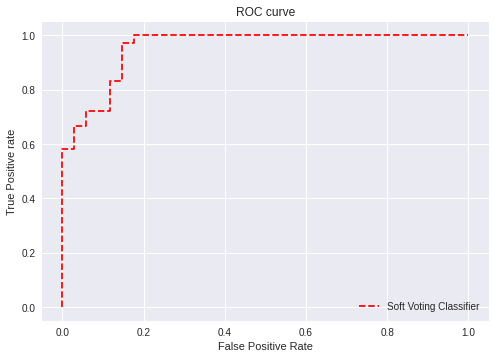

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='red', label='Soft Voting Classifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

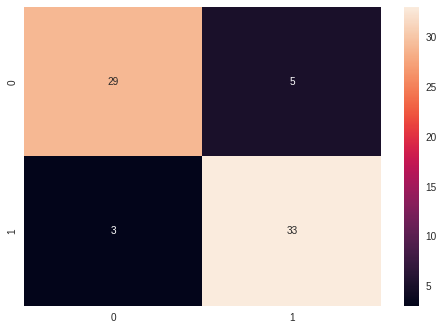

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)